#  Home Credit Default Risk Competition

### 1) Explanatory Data Analysis

##### The points of the EDA is bellow.
##### """
What do you predict in this competition? What is the purpose variable?
What are the merits that companies can gain by hosting this competition?
What is to influence the prediction before seeing the data set?
##### """

###### Predict how high the ability of each applicant to repay the loan.
###### Purpose Variable: application_train.csv / Target (TRUE: Can not repay, FALSE: Can repay)
##### Benefits:The company is able to expand into a new area by quantified suvey,  not  by the human skin sensation,  .

###### Secondary things: Recruitment, Advertisement
#### Things that are likely to influence forecast results: Annual income, Family composition, Past bad debts, Position of work, Number of followers of SNS, Address, Lease, Marriage, Educational qualification

### 2) Overview  of the data

Grasp the overview of the data.

##### (Example) Using ".head (),. Info (), describe ()" etc.
Look for missing values.
Graph the number of data for each class.
Please also explain and consider not only the code, table and graph, but also the discussion.

In [1]:
# import necessary modul
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
from scipy import stats
import scipy as sp

from quilt.data.ResidentMario import missingno_data
import missingno as msno

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

1) First, check the style of submission.

In [2]:
df_submission = pd.read_csv('sample_submission.csv')

In [3]:
df_submission.head()

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


2) Import the data from same directory.

In [4]:
df_train = pd.read_csv('application_train.csv')

In [5]:
# Number of display in the column(The default is 50)
pd.set_option("display.max_colwidth", 100)

# number of index
pd.set_option("display.max_rows", 1500)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


3) .head()、.info()、describe()などを使う

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


2)欠損値の有無を見る

In [8]:
df_train.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [9]:
sorted(df_train, reverse=True)

['YEARS_BUILD_MODE',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_AVG',
 'WEEKDAY_APPR_PROCESS_START',
 'WALLSMATERIAL_MODE',
 'TOTALAREA_MODE',
 'TARGET',
 'SK_ID_CURR',
 'REG_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_CITY_NOT_WORK_CITY',
 'REG_CITY_NOT_LIVE_CITY',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT',
 'REGION_POPULATION_RELATIVE',
 'OWN_CAR_AGE',
 'ORGANIZATION_TYPE',
 'OCCUPATION_TYPE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_AVG',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE',
 'NAME_CONTRACT_TYPE',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_AVG',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_AVG'

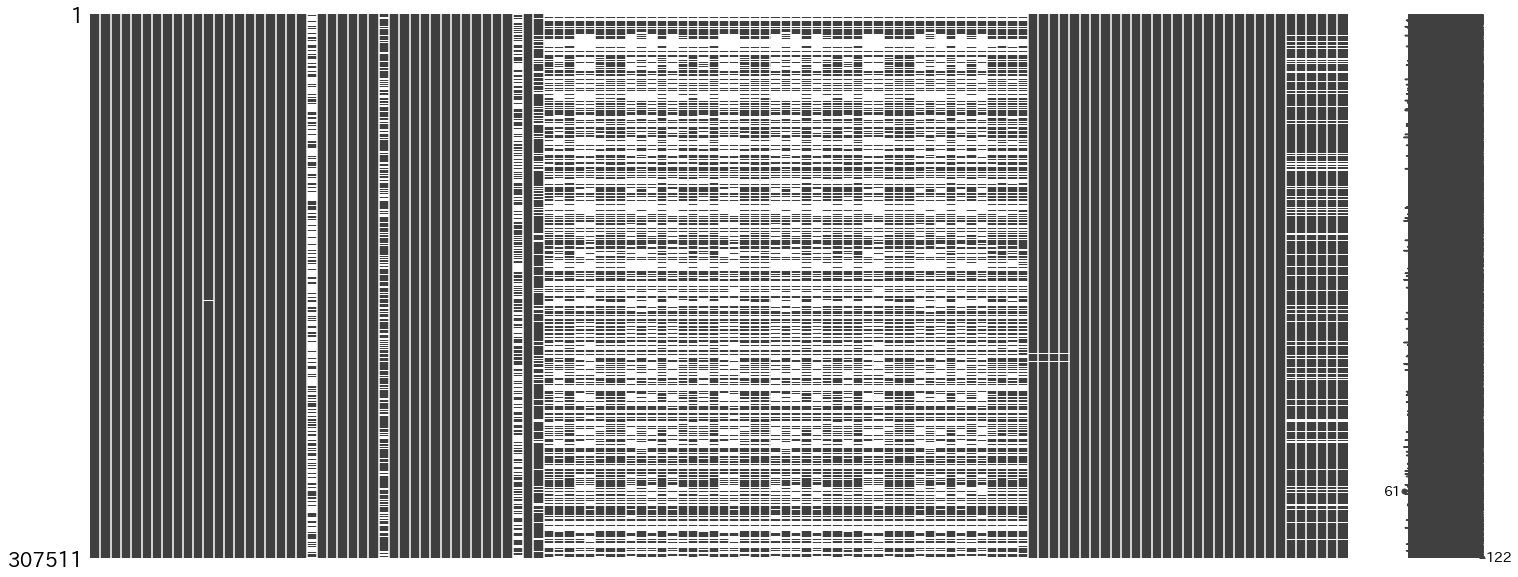

In [10]:
# View missing values
msno.matrix(df_train)

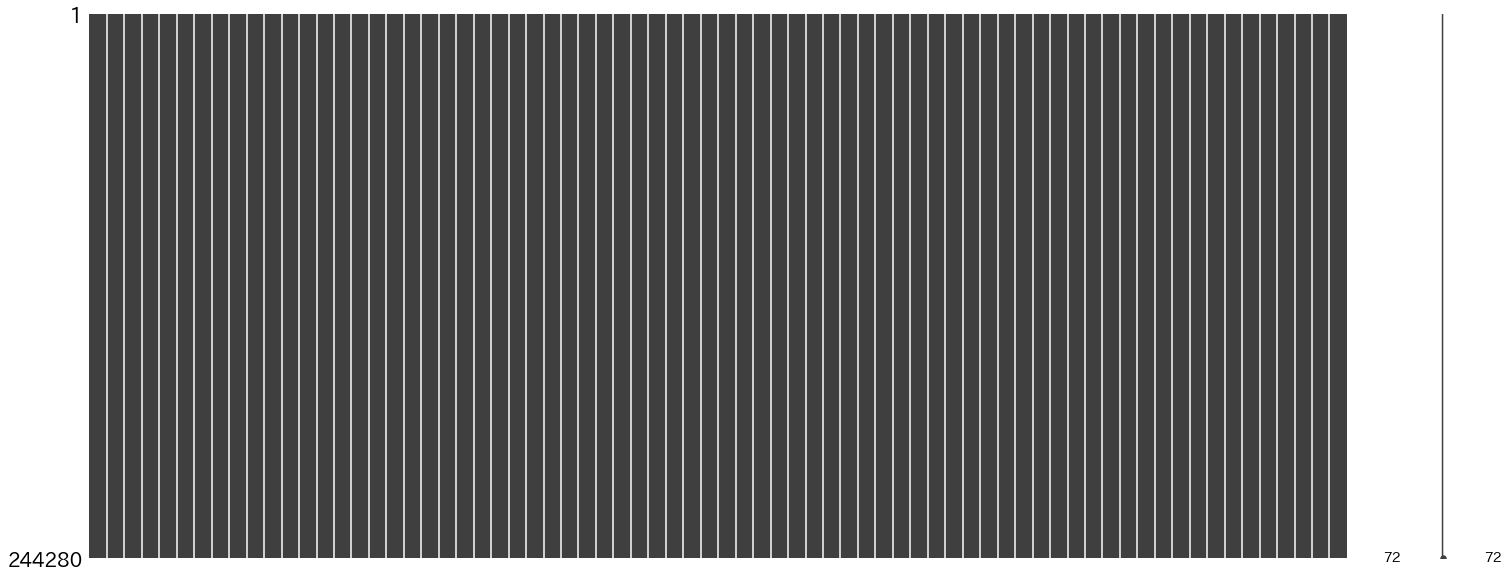

In [11]:
# organize the datae 
df_train_analysis = df_train.dropna(thresh=len(df_train)*0.8, axis=1)
df_train_analysis = df_train_analysis.dropna(axis=0)

len(df_train_analysis)
msno.matrix(df_train_analysis)

In [12]:
# Recheck
df_train_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244280 entries, 0 to 307510
Data columns (total 72 columns):
SK_ID_CURR                     244280 non-null int64
TARGET                         244280 non-null int64
NAME_CONTRACT_TYPE             244280 non-null object
CODE_GENDER                    244280 non-null object
FLAG_OWN_CAR                   244280 non-null object
FLAG_OWN_REALTY                244280 non-null object
CNT_CHILDREN                   244280 non-null int64
AMT_INCOME_TOTAL               244280 non-null float64
AMT_CREDIT                     244280 non-null float64
AMT_ANNUITY                    244280 non-null float64
AMT_GOODS_PRICE                244280 non-null float64
NAME_TYPE_SUITE                244280 non-null object
NAME_INCOME_TYPE               244280 non-null object
NAME_EDUCATION_TYPE            244280 non-null object
NAME_FAMILY_STATUS             244280 non-null object
NAME_HOUSING_TYPE              244280 non-null object
REGION_POPULATION_RELATI

In [13]:
# check null
df_train_analysis.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

In [14]:
sorted(df_train_analysis.columns)

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_EMAIL',
 'FLAG_EMP_PHONE',
 'FLAG_MOBIL',
 'FLAG_OWN_CAR',

3) Graph the number of data for each class

When lending money to 307511 people,
24825 people who do not return money.
282686people who will return the money.


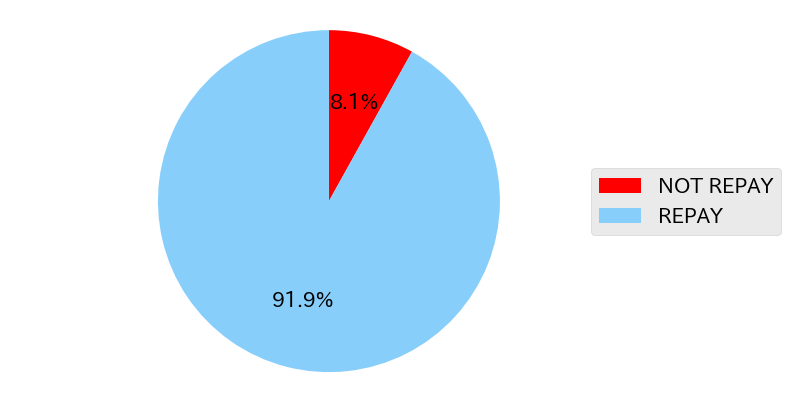

In [15]:
# TRUE: NOT REPAY, FALSE:REPAY
TARGET_TRUE = df_train["TARGET"].sum() 
TARGET_FALSE = df_train["TARGET"].count() - df_train["TARGET"].sum() 

list_TARGET = [TARGET_TRUE, TARGET_FALSE]

print("When lending money to {} people,".format(TARGET_TRUE+TARGET_FALSE))
print("{} people who do not return money.".format(TARGET_TRUE))
print("{}people who will return the money.".format(TARGET_FALSE))


# draw the pie
label = ['NOT REPAY', 'REPAY']
colors = ['red', 'lightskyblue']
size = [15, 30, 45]
explode = (0, 0.1, 0)

plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})

size=(9,5)

plt.figure(figsize=size,dpi=100)
plt.pie(list_TARGET,colors=colors,counterclock=False,startangle=90,autopct=lambda p:'{:.1f}%'.format(p) if p>=5 else '')
plt.subplots_adjust(left=0,right=0.7)
plt.legend(label,fancybox=True,loc='center left',bbox_to_anchor=(0.9,0.5))
plt.axis('equal') 
plt.savefig('figure.png',bbox_inches='tight',pad_inches=0.05)

4) Description and discussion of results

ex] The probability of bad debts is 24,825 people. This is 8.1% against the total number of training data 282686.
It is necessary to confirm what kind of result will be obtained when it is based on the amount basis, because this is a percentage based on the number of people, i.

cf) Down Processing continuation: Digitization

### 3) Set Issue

After looking overview of the data, please set up multiple issues and questions .

【Issues/ Questions】

Ex]

· Scatter plot before standardization and scatter diagram after doing ○ Scatter plot

· Know the most influential factor ○ Decision tree

· Where the missing value occurs ○

· I want to know the investment efficiency, how much risk if I do not return it ×

· Arrange feature quantities in descending order of correlation with target ○

· See cross-correlation between features ○

· Scheme in Linear regression analysis ×

· Convert category type to int type and re-output the table ○

### 4) Data mining

Let's proceed with data search to solve the problem 3). please add new questions when new question they are born in the process. 

Please output a total of 15 tables or graphs. And let's consider it with markdown against it.

In [16]:
"""

Convert category type to int type and re-output the table

"""

df_train_object = df_train_analysis.select_dtypes(include=object).columns

for col in df_train_object:
    print(df_train_analysis[col].value_counts())

Cash loans         222308
Revolving loans     21972
Name: NAME_CONTRACT_TYPE, dtype: int64
F      162361
M       81915
XNA         4
Name: CODE_GENDER, dtype: int64
N    158789
Y     85491
Name: FLAG_OWN_CAR, dtype: int64
Y    168943
N     75337
Name: FLAG_OWN_REALTY, dtype: int64
Unaccompanied      199218
Family              31633
Spouse, partner      8735
Children             2536
Other_B              1316
Other_A               636
Group of people       206
Name: NAME_TYPE_SUITE, dtype: int64
Working                 125885
Commercial associate     56151
Pensioner                43914
State servant            18311
Student                     13
Businessman                  4
Unemployed                   2
Name: NAME_INCOME_TYPE, dtype: int64
Secondary / secondary special    172102
Higher education                  61387
Incomplete higher                  7820
Lower secondary                    2835
Academic degree                     136
Name: NAME_EDUCATION_TYPE, dtype: int64
Marrie

In [17]:
# change object to int type
for column in df_train_object:
    df_train_analysis[column], _ = pd.factorize(df_train_analysis[column])
    df_train_analysis[column] = df_train_analysis[column].astype('int')

In [18]:
df_train_analysis.head() # No.0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,0,0,0,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,100004,0,1,0,1,0,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,0,0,0,0,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,0,1,1,0,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,0,0,1,0,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Description above) By changing the category type to the int type, we were able to change to the state that data mining can be done

In [19]:
# Random sampling 10000 index
import random
df_train_sample = df_train_analysis.sample(n=10000)
df_train_sample.head() # No1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
49957,157828,0,0,0,0,1,0,225000.0,900000.0,26446.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0
138422,260516,0,1,1,0,0,0,63000.0,180000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
281120,425693,0,1,1,0,0,0,112500.0,337500.0,16875.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
98688,214592,0,0,1,0,1,0,135000.0,675000.0,24246.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
170578,297693,0,0,1,0,1,0,134419.5,270000.0,15214.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [20]:
# rearrange: objects --> objective variable --> int or float
target = 'TARGET' # objective variable

df_train_ob = df_train_sample[df_train_object] # columns of object

df_train_in = df_train_sample.drop(df_train_object, axis=1) # columns of int
df_train_in = df_train_in.drop(target, axis=1)

y = df_train_sample[target] # a column of objective variable

# marge 
df_train_sample = pd.concat([df_train_ob, y, df_train_in], axis=1)
df_train_sample.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'TARGET', 'SK_ID_CURR', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

In [21]:
# ttest Target & int or float data
list_ttest = []
train_columns_in = df_train_in.columns

for column in train_columns_in:
    t, p = stats.ttest_rel(y, df_train_sample[column])
    if p <=0.05:
        list_ttest.append(column)
        print( "o{} :p値 = {:.40f}".format(column, p))
        
    else:
        print( "x{} :p値 = {:.40f}".format(column, p))

print(len(train_columns_in))
print(len(list_ttest))
# NO2

oSK_ID_CURR :p値 = 0.0000000000000000000000000000000000000000
oCNT_CHILDREN :p値 = 0.0000000000000000000000000000000000000000
oAMT_INCOME_TOTAL :p値 = 0.0000000000000000000000000000000000000000
oAMT_CREDIT :p値 = 0.0000000000000000000000000000000000000000
oAMT_ANNUITY :p値 = 0.0000000000000000000000000000000000000000
oAMT_GOODS_PRICE :p値 = 0.0000000000000000000000000000000000000000
oREGION_POPULATION_RELATIVE :p値 = 0.0000000000000000000000000000000000000000
oDAYS_BIRTH :p値 = 0.0000000000000000000000000000000000000000
oDAYS_EMPLOYED :p値 = 0.0000000000000000000000000000000000000000
oDAYS_REGISTRATION :p値 = 0.0000000000000000000000000000000000000000
oDAYS_ID_PUBLISH :p値 = 0.0000000000000000000000000000000000000000
oFLAG_MOBIL :p値 = 0.0000000000000000000000000000000000000000
oFLAG_EMP_PHONE :p値 = 0.0000000000000000000000000000000000000000
oFLAG_WORK_PHONE :p値 = 0.0000000000000000000000000000000000000000
oFLAG_CONT_MOBILE :p値 = 0.0000000000000000000000000000000000000000
oFLAG_PHONE :p値 = 0.00000

Description above) Only REG_CITY_NOT_LIVE_CITY is not related to TARGET

In [22]:
list_xtest = []

for column in df_train_object:
    crossed = pd.crosstab(y, df_train_sample[column])
    x2, p, dof, expected = sp.stats.chi2_contingency(crossed)
    
    if p < 0.05:
        print(column)
        print("カイ二乗値は %(x2)s" %locals())
        print("確率は %(p)s" %locals())
        print("自由度は %(dof)s" %locals())
        print(expected)
        print('---------------------------------')
        list_xtest.append(column)
    else:
        continue

print(list_xtest)
print(len(df_train_object))
print(len(list_xtest)) # No3

NAME_CONTRACT_TYPE
カイ二乗値は 8.886395489599508
確率は 0.0028730336551132684
自由度は 1
[[8386.4064  841.5936]
 [ 701.5936   70.4064]]
---------------------------------
CODE_GENDER
カイ二乗値は 18.862256405068422
確率は 1.4050538608378485e-05
自由度は 1
[[3127.3692 6100.6308]
 [ 261.6308  510.3692]]
---------------------------------
FLAG_OWN_CAR
カイ二乗値は 16.497520551128066
確率は 4.871373604542987e-05
自由度は 1
[[6023.1156 3204.8844]
 [ 503.8844  268.1156]]
---------------------------------
NAME_INCOME_TYPE
カイ二乗値は 51.89864390817931
確率は 3.147816509950662e-11
自由度は 3
[[4699.8204  738.24   2105.8296 1684.11  ]
 [ 393.1796   61.76    176.1704  140.89  ]]
---------------------------------
NAME_EDUCATION_TYPE
カイ二乗値は 16.083539589154107
確率は 0.002909090278932535
自由度は 4
[[6.4974348e+03 2.3263788e+03 2.8791360e+02 1.1258160e+02 3.6912000e+00]
 [5.4356520e+02 1.9462120e+02 2.4086400e+01 9.4184000e+00 3.0880000e-01]]
---------------------------------
NAME_FAMILY_STATUS
カイ二乗値は 27.52636768240247
確率は 1.55562614017797e-05
自由度は 4
[[126

Description above) Only three columns is not related to TARGET

In [35]:
# marge xtest and ttest columns
xtest = df_train_sample[list_xtest]
ttest = df_train_sample[list_ttest]

X = pd.concat([xtest, ttest], axis=1)

In [38]:
X.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,SK_ID_CURR,CNT_CHILDREN,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
49957,0,0,0,3,0,4,0,3,157828,0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0
138422,1,1,0,0,0,1,3,25,260516,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
281120,1,1,0,3,0,1,0,3,425693,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
98688,0,1,0,0,0,0,0,56,214592,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
170578,0,1,0,2,1,0,0,21,297693,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


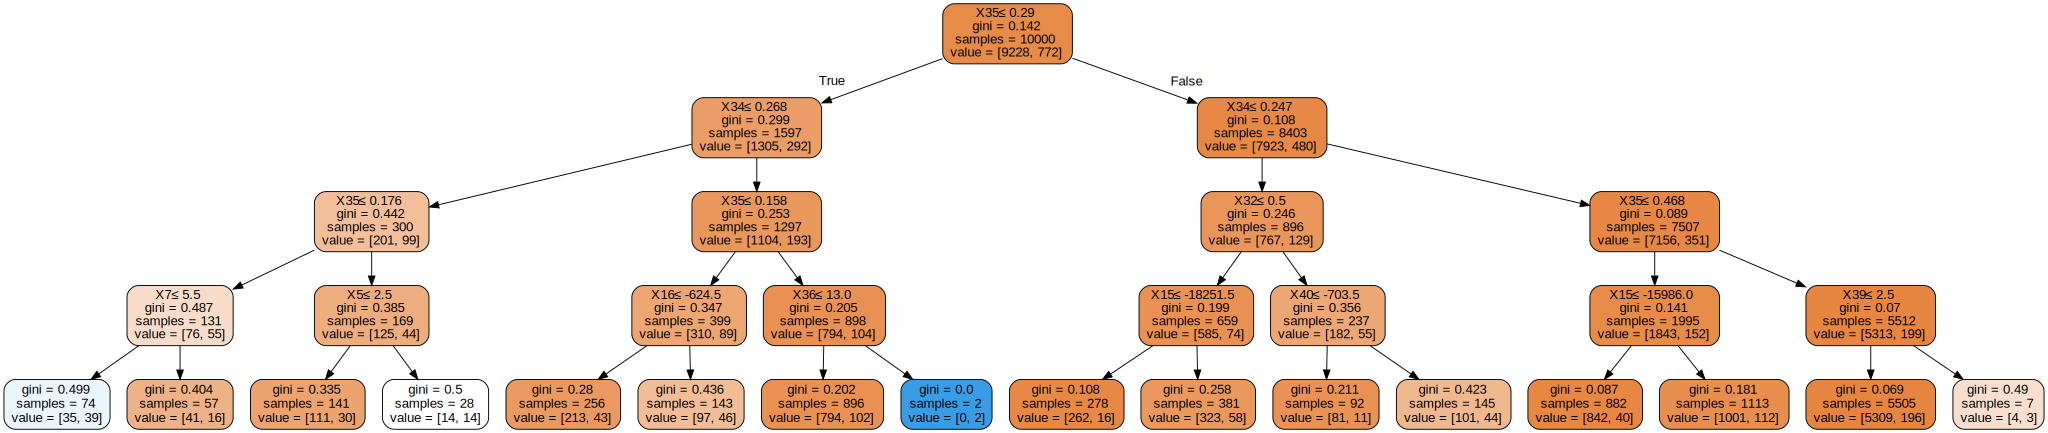

In [72]:
# No4
# Knowing the most influential factor by output by decision tree

# !pip install pydotplus
# !pip install graphviz

# visualized
from sklearn import tree
import graphviz 

# decide max depth
MAX_DEPTH = 4

clf = tree.DecisionTreeClassifier(max_depth=MAX_DEPTH)

clf = clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)

graph.render("sample") 

# draw the structure of tree
dot_data = tree.export_graphviz(clf, out_file=None,   
                     filled=True, rounded=True,  
                     special_characters=True) 

size=(9,5)

graph = graphviz.Source(dot_data) 
graph

In [53]:
# hard coding
print(X.columns[5])
print(X.columns[7])
print(X.columns[15])
print(X.columns[16])
print(X.columns[32])
print(X.columns[34])
print(X.columns[35])
print(X.columns[36])
print(X.columns[39])
print(X.columns[40])

NAME_FAMILY_STATUS
ORGANIZATION_TYPE
DAYS_BIRTH
DAYS_EMPLOYED
REG_CITY_NOT_WORK_CITY
EXT_SOURCE_2
EXT_SOURCE_3
OBS_30_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE


Description above) TARGET is related to 10 columns accoding to dicision tree.

In [73]:
# hard coding
tree_list = ['NAME_FAMILY_STATUS', 
'ORGANIZATION_TYPE', 
'DAYS_BIRTH', 
'DAYS_EMPLOYED', 
'REG_CITY_NOT_WORK_CITY', 
'EXT_SOURCE_2', 
'EXT_SOURCE_3', 
'OBS_30_CNT_SOCIAL_CIRCLE', 
'DEF_60_CNT_SOCIAL_CIRCLE', 
'DAYS_LAST_PHONE_CHANGE']

df_train_tree = df_train_sample.loc[:, tree_list]

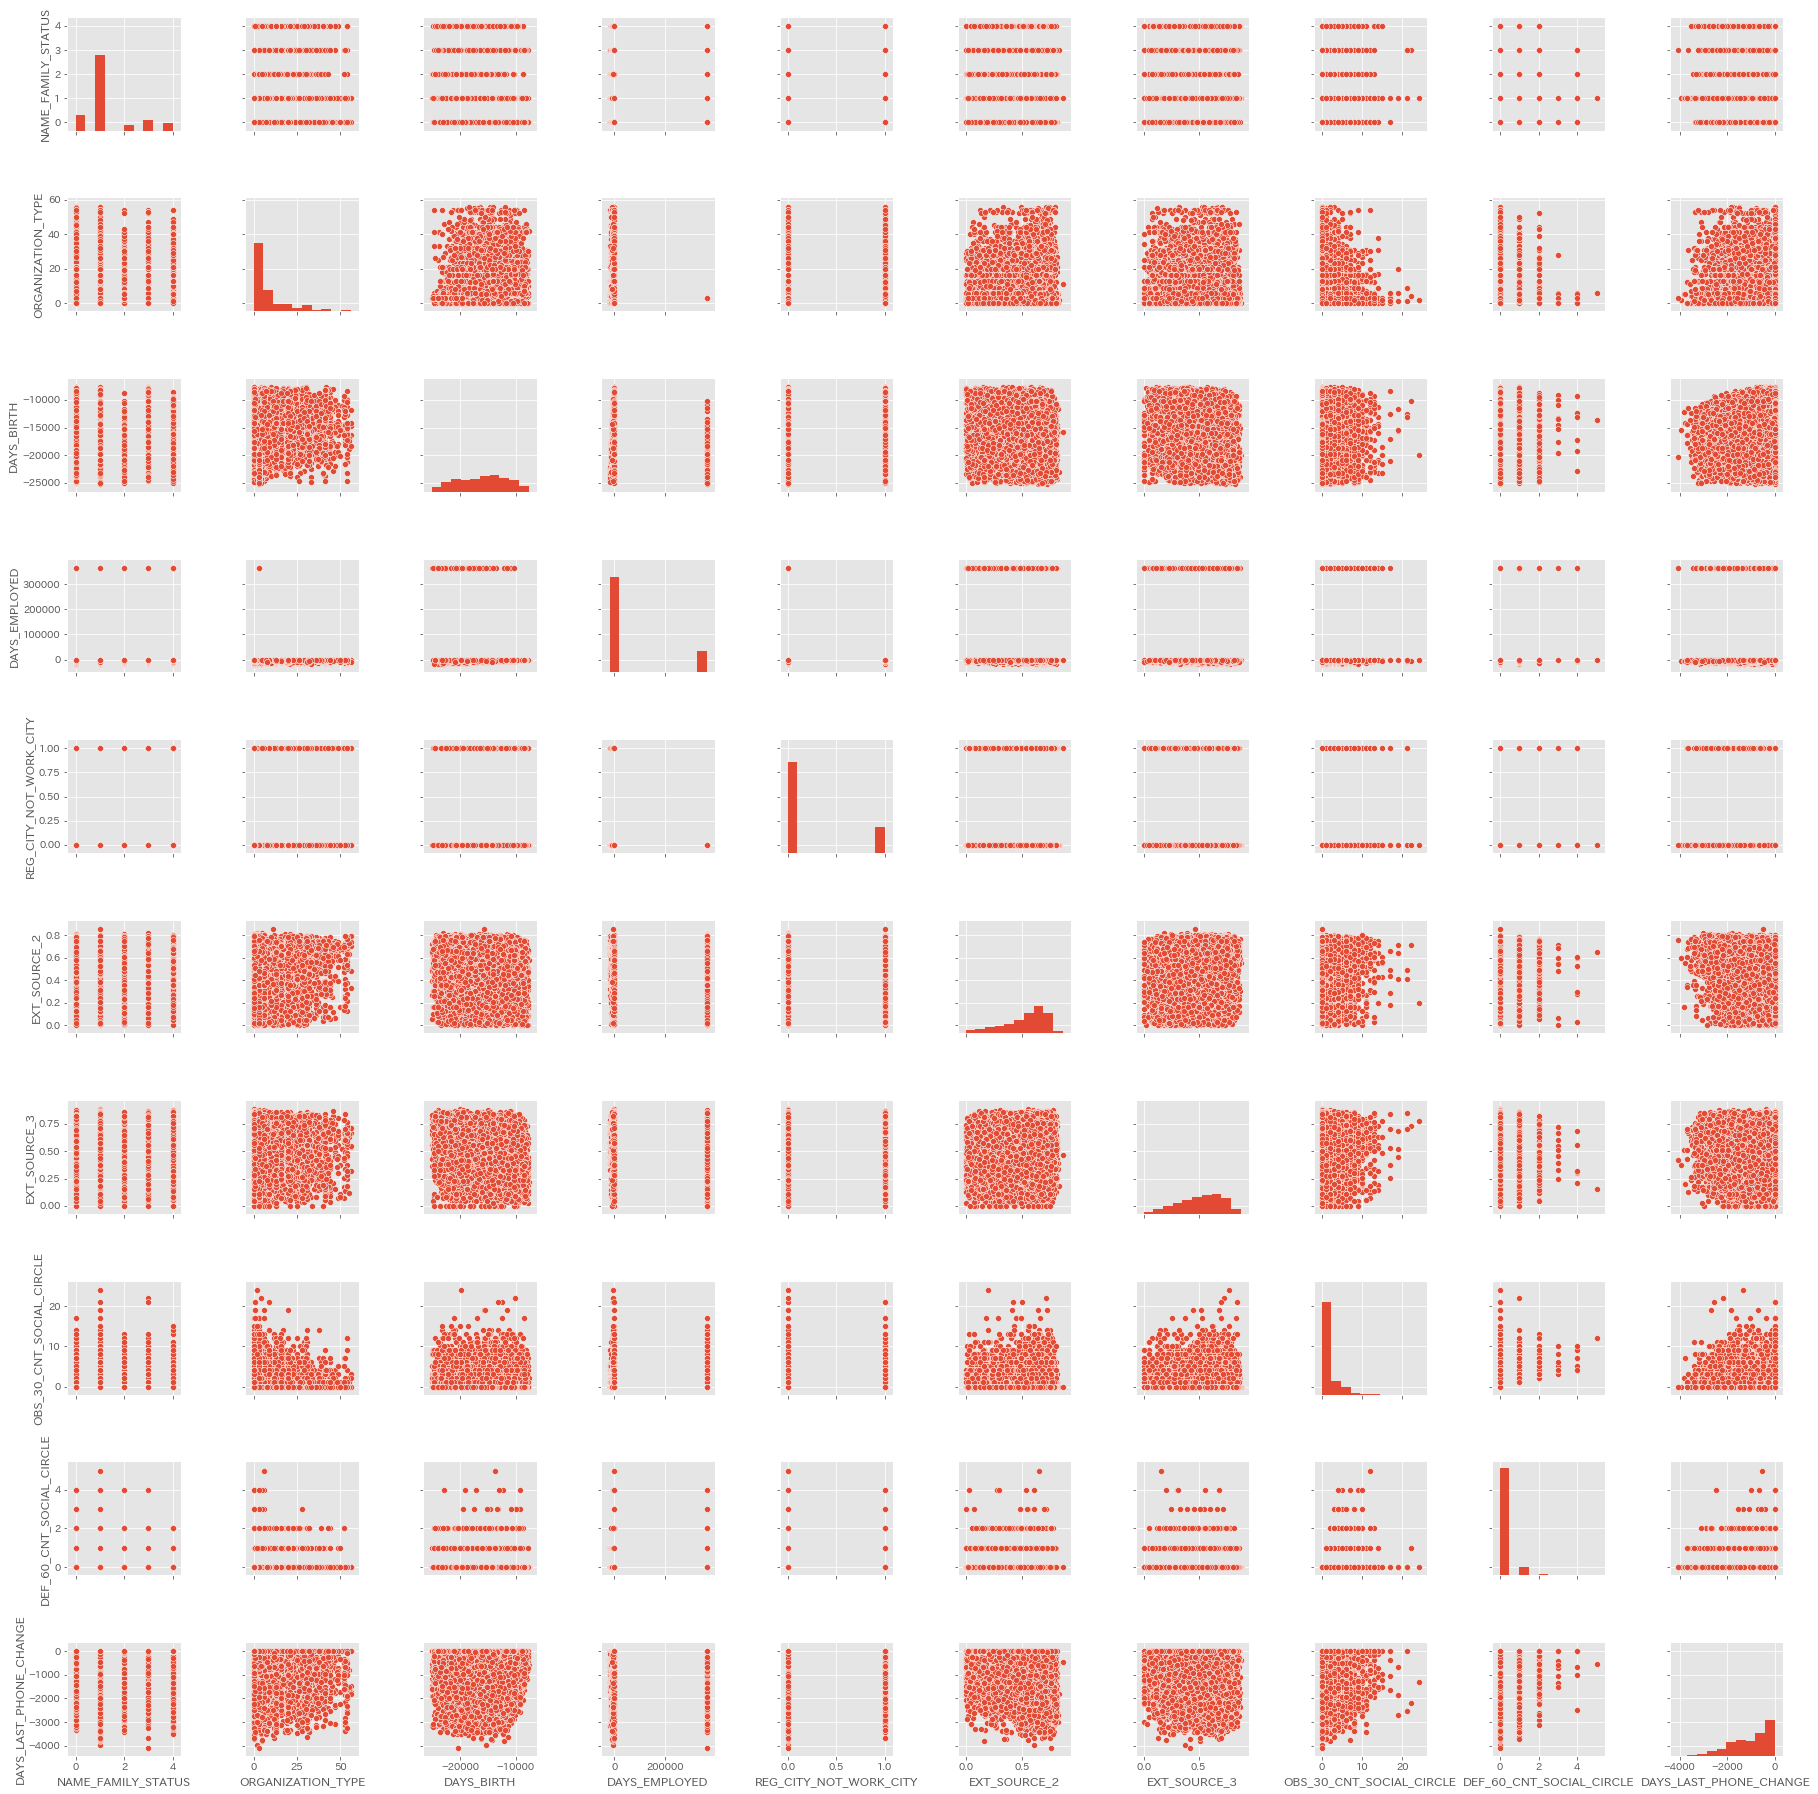

In [62]:
# No5
# Data before standardization

import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

sns.pairplot(df_train_tree)

Description above) They don't relate each other.

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_train_tree)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [64]:
scaler.mean_

array([ 1.30990000e+00,  8.10810000e+00, -1.61163668e+04,  6.46465590e+04,
        2.23600000e-01,  5.19211912e-01,  5.10602499e-01,  1.41590000e+00,
        9.23000000e-02, -1.00024630e+03])

In [70]:
scaler_df_tree = pd.DataFrame(scaler.transform(df_train_tree))

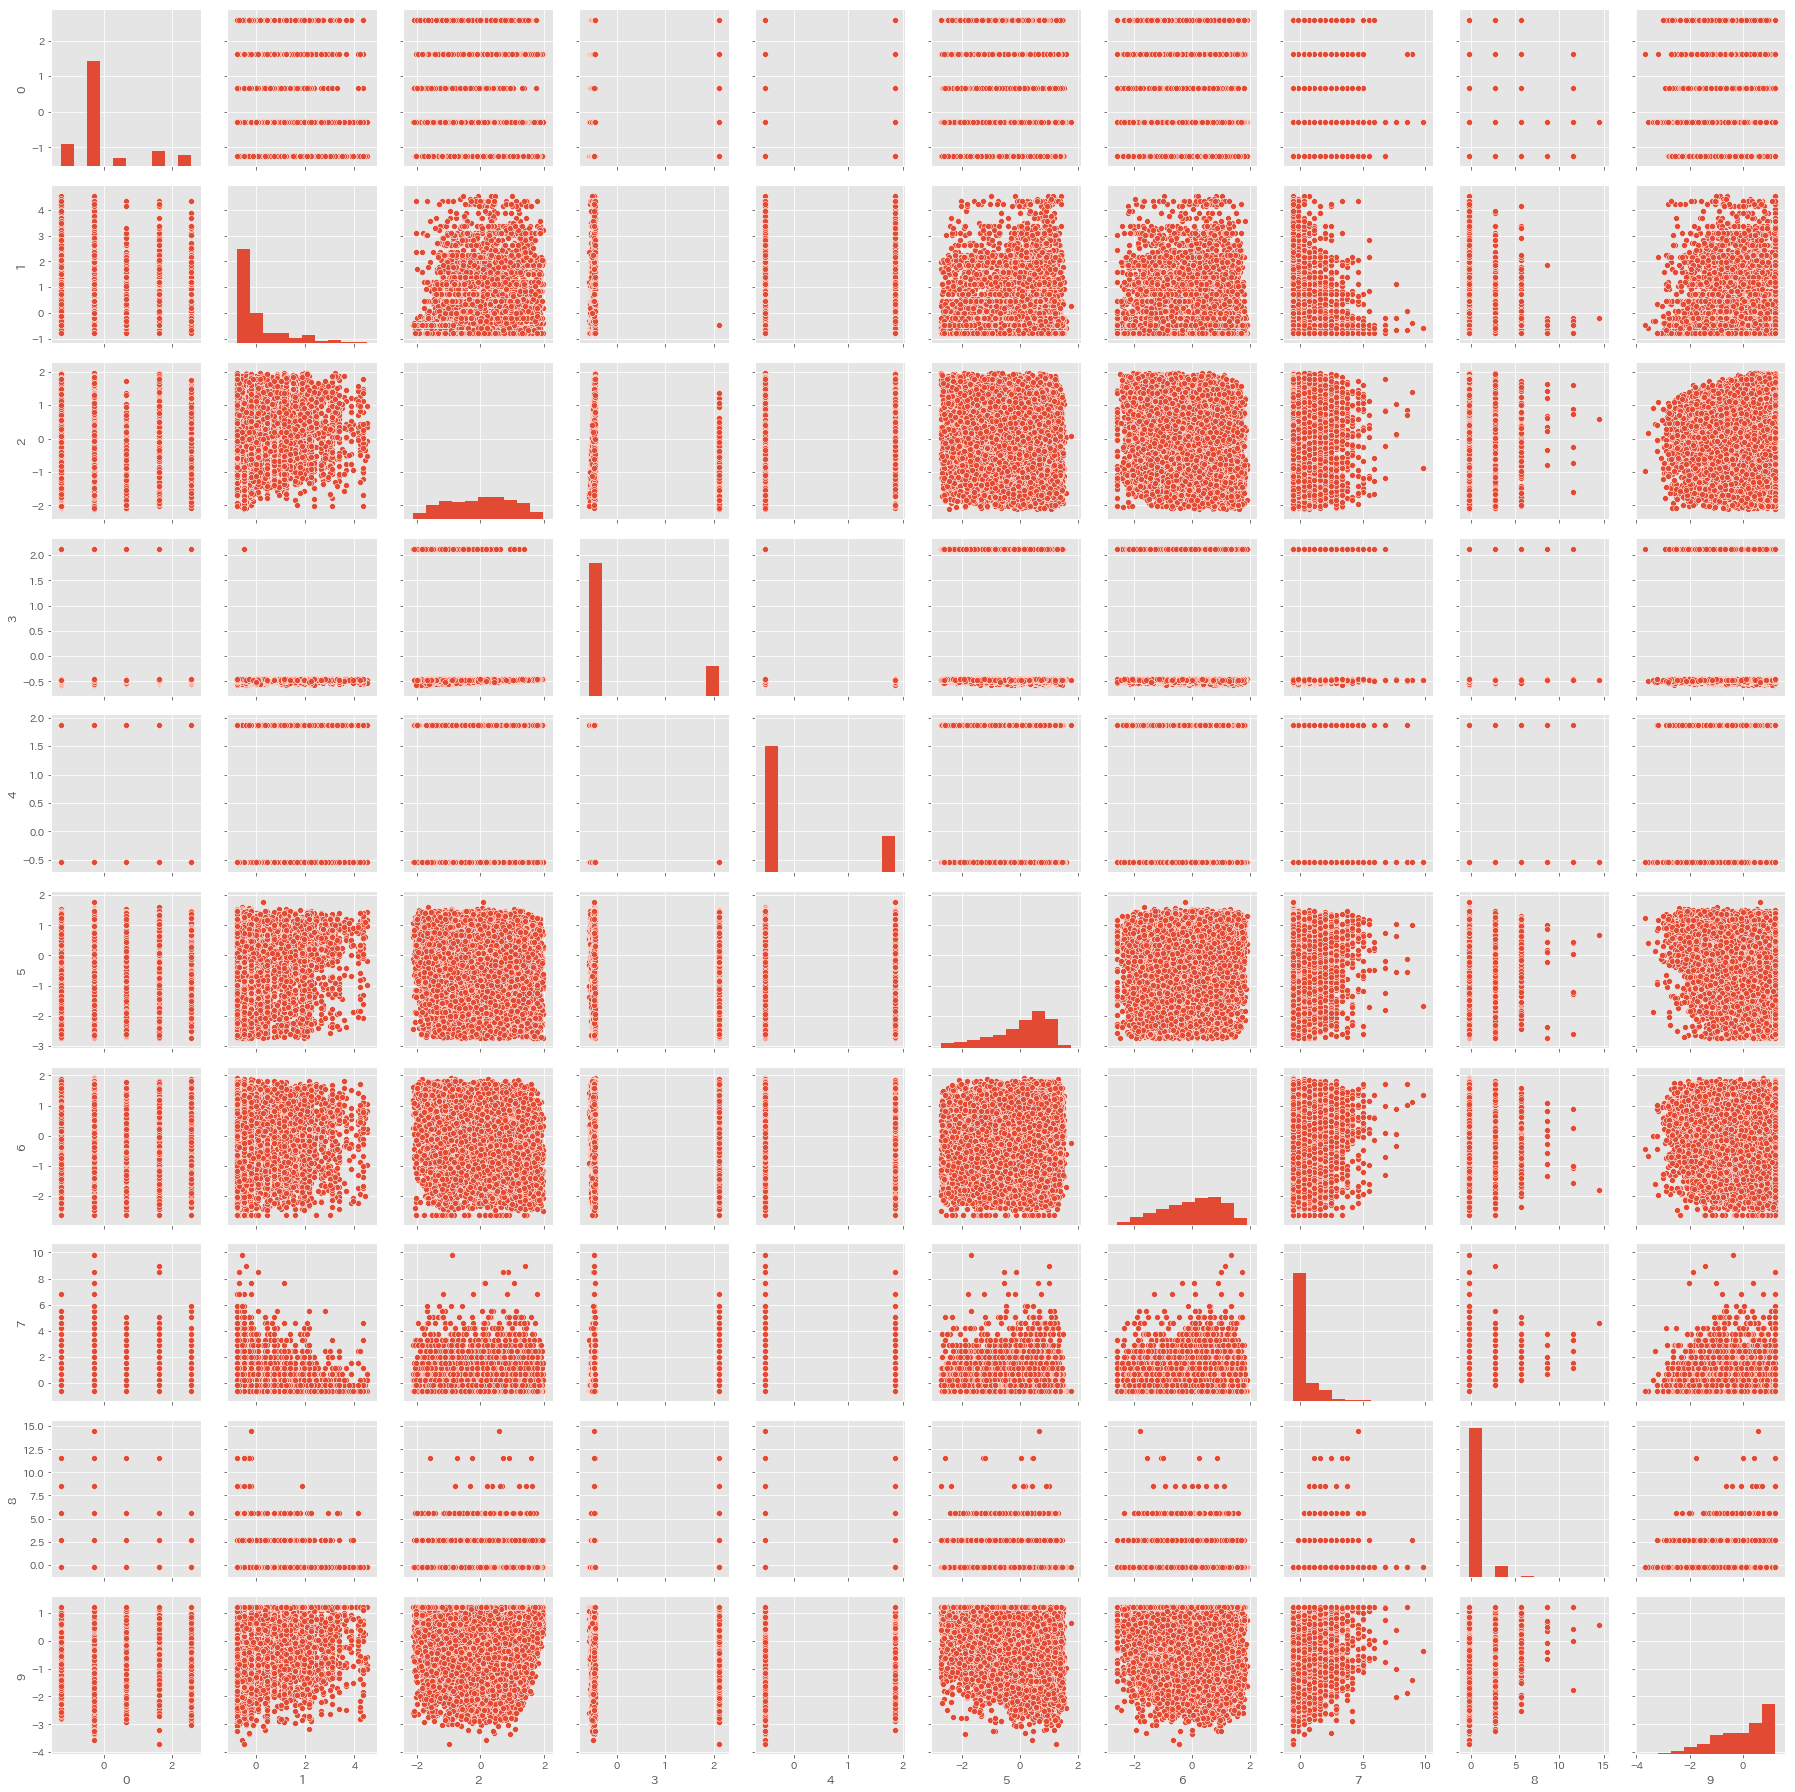

In [71]:
# No6
# after stalization
sns.pairplot(scaler_df_tree)

Description above) Same as No.5, but changed the value.

In [75]:
df_train = pd.concat([X, y], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


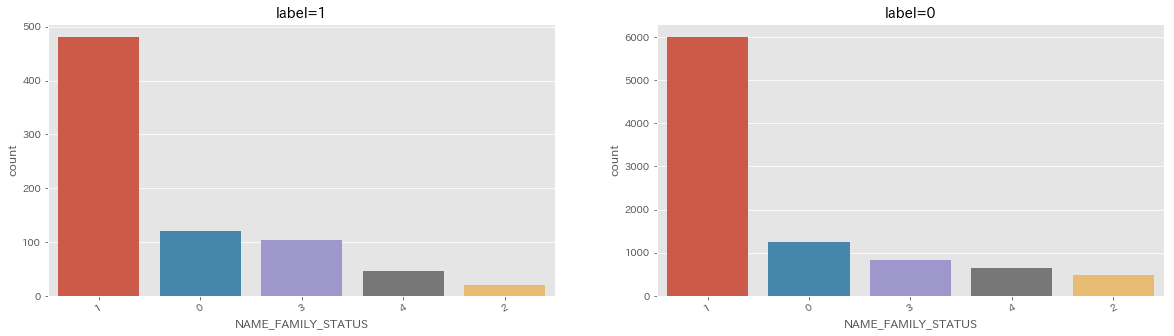

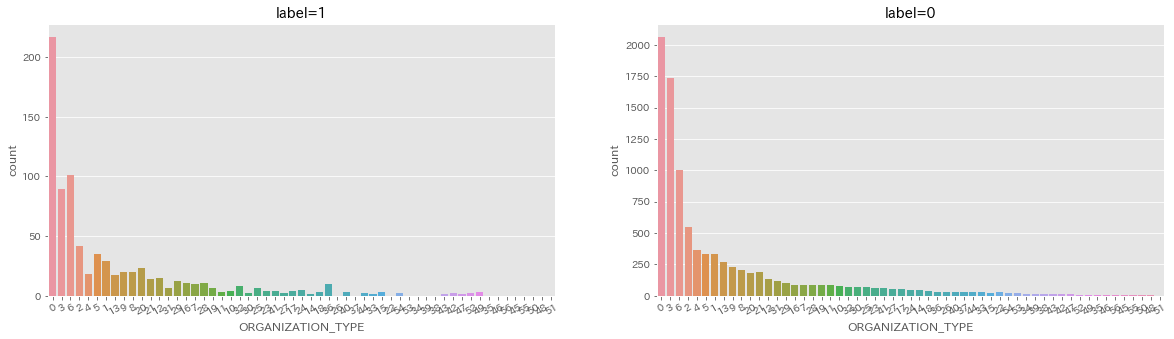

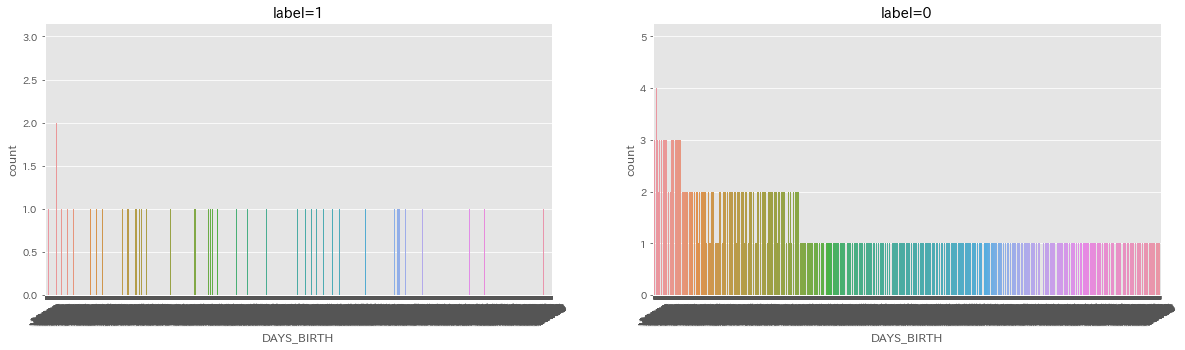

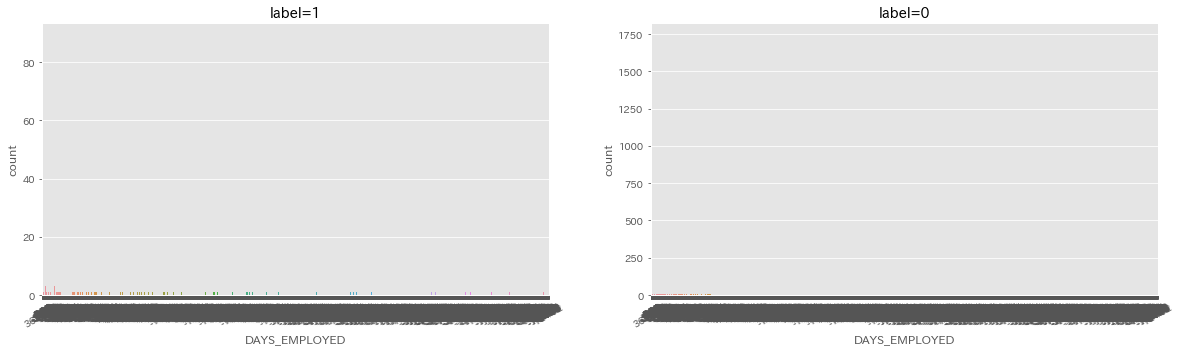

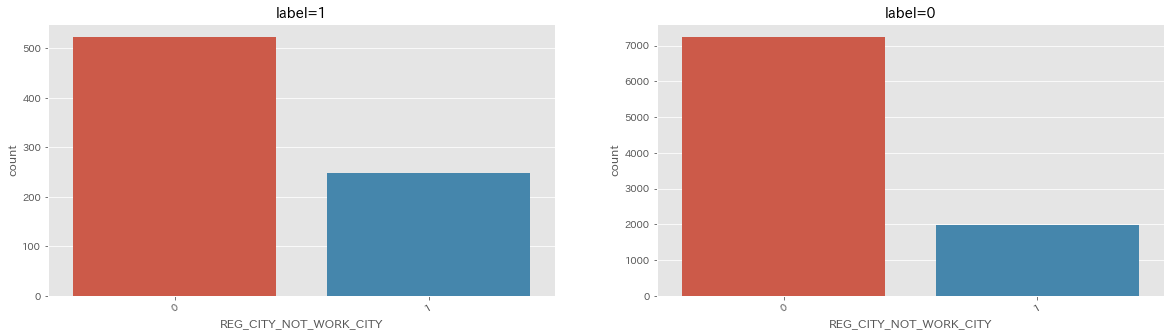

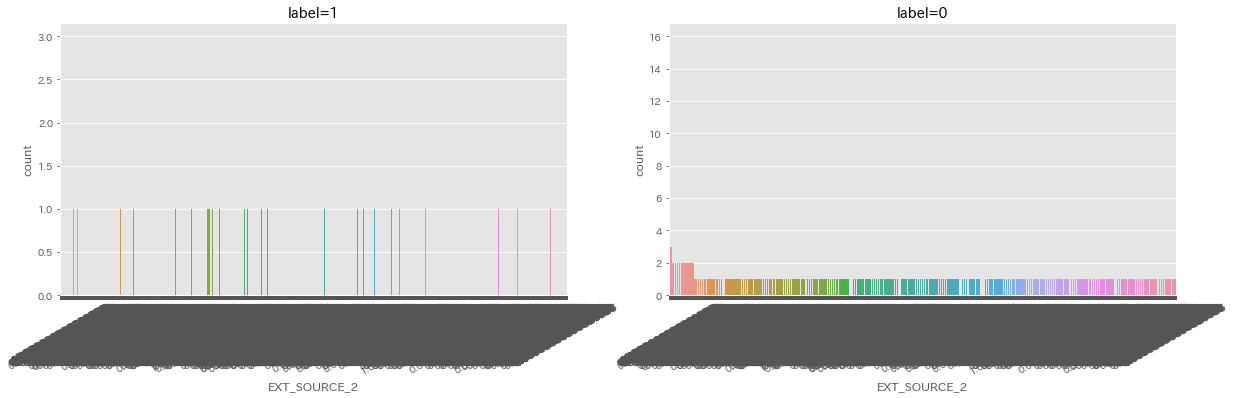

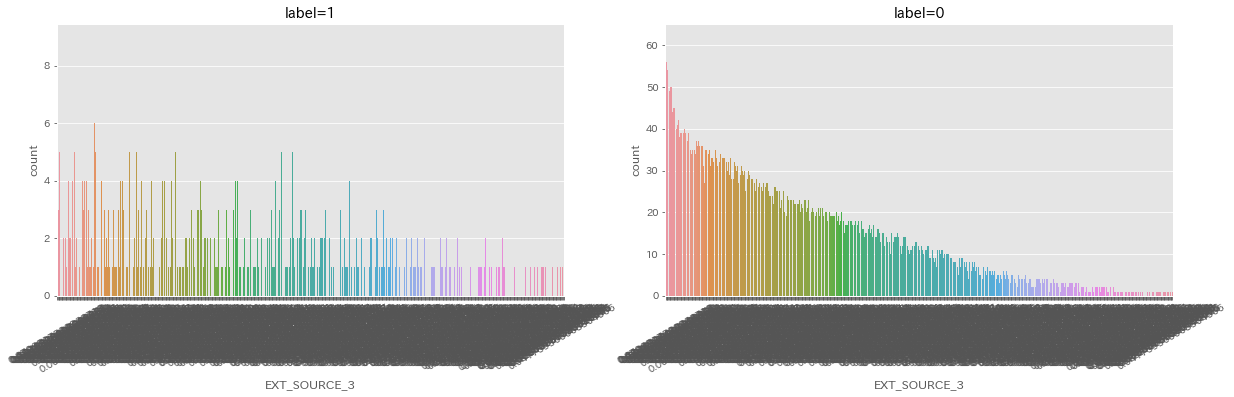

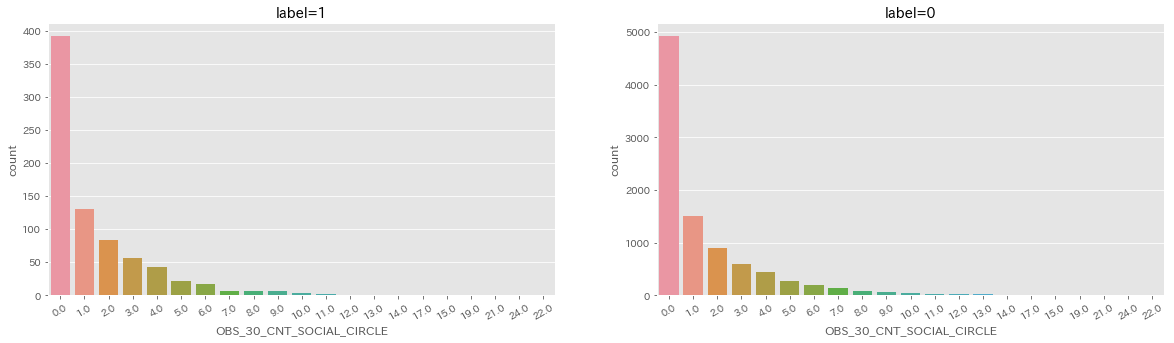

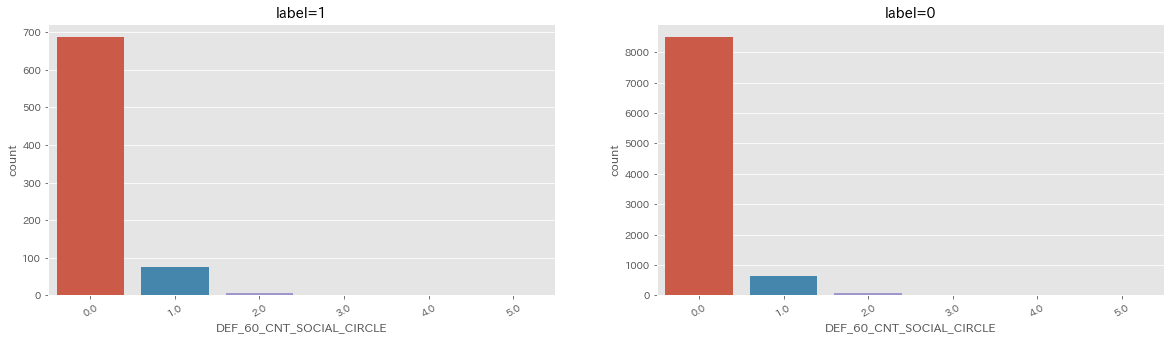

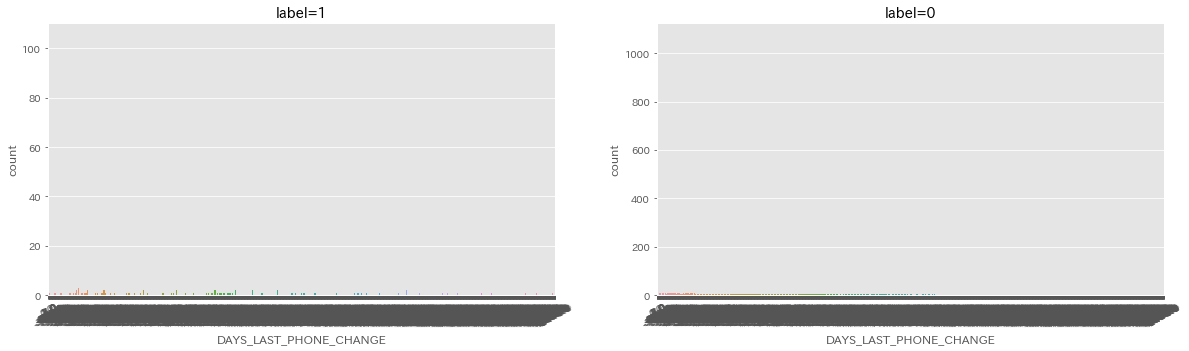

In [78]:
# generate definition 
def countplotter(label):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.xticks(rotation=30)
    sns.countplot(df_train.loc[df_train['TARGET'] != 0][label],order = df_train[label].value_counts().index)
    
    plt.title('label=1')
    plt.subplot(1,2,2)
    plt.xticks(rotation=30)
    plt.title('label=0')
    sns.countplot(df_train.loc[df_train['TARGET'] == 0][label],order = df_train[label].value_counts().index)
    
# plot separate by target: No7~16
for label in tree_list:
    countplotter(label)

Description above) EXIT_SOURCE_3, EXIT_SOURCE_2, ORGANIZATION_TYPE are different between NOT REPAY(TRUE) and REPAY(FALSE).

In [80]:
# No18
# Looking at the correlation system with TARGET View the cross-correlation between feature values arranging feature quantities in descending order of correlation with targets
df_crr = df_train.corr()

# Genarate sorted dataframe
df_crr_sort = df_crr.sort_values('TARGET', ascending=False)
df_crr_sort

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,SK_ID_CURR,CNT_CHILDREN,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
TARGET,-0.030461,-0.043826,-0.041011,-0.068134,-0.021771,0.001707,0.035816,-0.001608,0.002935,0.013963,...,-0.005786,0.012951,0.031570,0.020478,0.012144,0.009654,-0.002465,0.006986,0.020427,1.000000
DAYS_BIRTH,0.075476,-0.165643,0.131177,-0.460482,0.161231,-0.103147,0.161979,0.144386,-0.014141,0.340883,...,-0.003274,0.019039,0.047653,0.011116,-0.002642,-0.000547,0.002771,-0.010371,-0.069810,0.098568
REG_CITY_NOT_WORK_CITY,-0.001603,-0.156790,0.090957,-0.193356,0.013978,-0.026649,0.058793,0.071297,-0.005887,0.067917,...,-0.010735,0.013270,0.010282,0.016003,-0.007433,-0.017113,-0.030946,-0.017360,-0.001640,0.068682
REGION_RATING_CLIENT_W_CITY,-0.005491,0.040550,-0.056056,-0.041496,-0.050736,0.002218,-0.017480,0.001664,-0.002000,0.019219,...,-0.001180,-0.001180,-0.001669,0.016093,0.005707,0.011584,-0.072587,0.010164,0.022735,0.060111
REGION_RATING_CLIENT,-0.000729,0.038053,-0.056288,-0.051220,-0.045045,-0.000932,-0.013922,0.005094,-0.007146,0.022151,...,-0.002046,-0.002046,-0.002894,0.017084,0.006313,0.013073,-0.078886,0.010163,0.023868,0.056561
DAYS_LAST_PHONE_CHANGE,0.060124,-0.016961,-0.040495,0.001792,0.015125,-0.014005,0.004646,-0.007072,-0.021847,0.006022,...,0.005272,0.019365,0.027705,-0.005738,-0.015945,-0.010307,-0.045710,-0.014453,-0.120434,0.055728
FLAG_WORK_PHONE,-0.048795,-0.038286,0.007166,-0.222504,0.023076,-0.008440,0.016211,0.056490,0.010918,0.063592,...,0.002583,0.002583,-0.014081,-0.007206,-0.008005,0.001194,0.002019,-0.013786,-0.052363,0.054252
FLAG_EMP_PHONE,0.040037,-0.179819,0.164276,-0.749173,0.088253,-0.040685,0.072113,0.227978,-0.003296,0.253045,...,0.009455,0.009455,0.013374,0.013154,-0.003006,-0.004460,0.042611,-0.019150,-0.045182,0.050396
DAYS_ID_PUBLISH,0.043046,-0.000858,0.004427,-0.192841,0.027598,-0.024734,0.045010,0.072103,0.002004,-0.036776,...,-0.018745,-0.005066,0.033854,0.002737,-0.016187,-0.010343,-0.020065,-0.014010,-0.040108,0.042624
DAYS_REGISTRATION,0.026902,-0.080210,0.104585,-0.153675,0.090439,-0.029365,0.008361,0.050548,0.010600,0.176958,...,-0.014510,0.014748,0.017889,-0.006504,-0.011870,-0.025341,-0.011680,-0.017185,-0.011161,0.042447


Since the target was a classification problem in the first place, even the correlation coefficient has little meaning.
It was better to see if there was an effect by t test.

In [ ]:
# No19
# Missing value Where to happen
len(df_train_analysis)
msno.matrix(df_train_sample)

Missing values are processed beforehand, so they do not occur.